In [1]:
from google.colab import drive
drive.mount('content')
%cd content/"My Drive"/reddit

Drive already mounted at content; to attempt to forcibly remount, call drive.mount("content", force_remount=True).
/content/content/My Drive/reddit


In [2]:
!pip install pandas==0.25.0

In [3]:
!pip install pandas-profiling

Importing pandas for reading and manipulating dataframes, seaborn and matplotlib for visualization and reading the csv file.

As we do not need variables with unique and constant values as they do not offer any information gain, and columns with too many missing values we remove those columns along with timestamps and some css rendering data.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('reddit.csv')
data = data.drop_duplicates(subset='id',keep='last')
data.drop(['author_flair_css_class','author_flair_richtext','author_flair_text','author_flair_type','author_fullname'
           ,'approved_at_utc','banned_at_utc','full_link','id','link_flair_background_color','permalink','media_embed'
           ,'secure_media','secure_media_embed','media','author_flair_background_color','media_metadata','discussion_type'
           ,'crosspost_parent','crosspost_parent_list','author_created_utc','category','content_categories','removal_reason'
           ,'subreddit_name_prefixed','author_id','previous_visits','view_count','thumbnail_height','thumbnail_width'
           ,'subreddit_subscribers','event_end','event_start','created_utc','retrieved_on','created','edited',
           'updated_utc','mod_reports','user_reports','rte_mode','steward_reports','event_is_live','suggested_sort'
           ,'distinguished','can_gild','archived','og_title','og_description','quarantine','author_flair_text_color'
           ,'author_flair_template_id','link_flair_template_id','link_flair_css_class','treatment_tags','subreddit_id'
           ,'subreddit','preview','gildings','awarders','allow_live_comments','all_awardings','link_flair_text_color',
           'link_flair_richtext','link_flair_type','pwls','wls'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,16,18,19,20,21,22,24,25,26,27,28,29,30,31,35,37,38,39,41,45,46,47,51,57,59,62,63,64,65,66,67,68,70,71,72,73,74,76,78,79,80,82,84,85,87,88,89,90,95,96,97,98,99,100,101,102,103,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We find that there are some cases where the the flair has the same meaning but different spellings. So, we changed the the same so that classes have more instances for better analysis and insights.


In [5]:
data = data[data['link_flair_text'].notna()]

data.link_flair_text = data.link_flair_text.replace('Science', 'Science/Technology')
data.link_flair_text = data.link_flair_text.replace('Politics [Megathread]', 'Politics')
data.link_flair_text = data.link_flair_text.replace('Policy', 'Policy/Economy')
data.link_flair_text = data.link_flair_text.replace('Politics [OLD]', 'Politics')
data.link_flair_text = data.link_flair_text.replace('Technology', 'Science/Technology')
data.link_flair_text = data.link_flair_text.replace('Politics -- Source in comments', 'Politics')
data.link_flair_text = data.link_flair_text.replace('Policy/Economy -2017 Article ', 'Policy/Economy')

data = data[data.link_flair_text.isin(['AskIndia','Non-Political','Scheduled','Photography','Science/Technology',
                                         'Politics','Business/Finance','Policy/Economy','Sports','Food','[R]eddiquette'])]
len(data.link_flair_text)

591484

Adding the missing data by investigating the api documentations and sources.

In [0]:
data.brand_safe.fillna(False,inplace=True)
data.removed_by.fillna('none',inplace=True)
data.gilded.fillna(0.0,inplace=True)
data.loc[(~data.poll_data.isna()),'poll_data']=True
data.poll_data.fillna(False,inplace=True)
data.hidden.fillna(True,inplace=True)
data.banned_by.fillna('none',inplace=True)
data.author_cakeday.fillna(False,inplace=True)
data.whitelist_status.fillna('no_ads',inplace=True)
data.total_awards_received.fillna(0.0,inplace=True)
data.thumbnail.fillna('self',inplace=True)
data.spoiler.fillna(False,inplace=True)
data.send_replies.fillna(True,inplace=True)
data.removed_by_category.fillna('none',inplace=True)
data.post_hint.fillna('text',inplace=True)
data.pinned.fillna(True,inplace=True)
data.parent_whitelist_status.fillna('no_ads',inplace=True)
data.num_crossposts.fillna(0.0,inplace=True)
data.no_follow.fillna(False,inplace=True)
data.media_only.fillna(True,inplace=True)
data.locked.fillna(True,inplace=True)
data.is_video.fillna(False,inplace=True)
data.is_robot_indexable.fillna(True,inplace=True)
data.is_reddit_media_domain.fillna(False,inplace=True)
data.is_original_content.fillna(False,inplace=True)
data.is_meta.fillna(True,inplace=True)
data.is_crosspostable.fillna(True,inplace=True)
data.contest_mode.fillna(False,inplace=True)
data.can_mod_post.fillna(True,inplace=True)
data.author_premium.fillna(False,inplace=True)
data.author_patreon_flair.fillna(True,inplace=True)
data.selftext.fillna('none',inplace=True)



#print(data.locked.unique())
#print(data.locked.value_counts(dropna=False))


Getting a first look at our data.

In [7]:
data.head()

,author,author_patreon_flair,author_premium,can_mod_post,contest_mode,domain,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,pinned,post_hint,removed_by_category,score,selftext,send_replies,spoiler,stickied,subreddit_type,thumbnail,title,total_awards_received,url,whitelist_status,link_flair_text,author_cakeday,banned_by,poll_data,gilded,removed_by,hidden,brand_safe
1,pkmcreation,False,False,False,False,pkmcreation.com,False,False,False,False,False,False,False,False,False,True,0,0.0,False,all_ads,False,text,reddit,1,none,True,False,False,public,default,North Korea: ऐसा देश जहां बुनियादी अधिकारों को...,0.0,https://www.pkmcreation.com/2020/04/north-kore...,all_ads,Non-Political,False,none,False,0.0,none,True,False
2,BigBulkemails,False,False,False,False,self.india,True,False,False,False,True,True,False,False,False,True,1,0.0,False,all_ads,False,text,none,1,[Article](https://www.india.com/viral/over-93-...,True,False,False,public,self,93.5% people think Modi govt will handle Covid...,0.0,https://www.reddit.com/r/india/comments/g6jvwx...,all_ads,Politics,False,none,False,0.0,none,True,False
3,Ib90,False,False,False,False,indiatoday.in,True,False,False,False,True,False,False,False,False,True,0,0.0,False,all_ads,False,text,none,1,none,True,False,False,public,default,"BJP spreading virus of communal hatred, prejud...",0.0,https://www.indiatoday.in/india/story/bjp-spre...,all_ads,Politics,False,none,False,0.0,none,True,False
5,tandoori_idli,False,False,False,False,ndtv.com,True,False,False,False,True,False,False,False,False,True,0,0.0,False,all_ads,False,text,none,1,none,True,False,False,public,default,Increment On Dearness Allowance For Central Go...,0.0,https://www.ndtv.com/business/covid-19-news-in...,all_ads,Non-Political,False,none,False,0.0,none,True,False
6,thestreetsareours,False,False,False,False,timesofindia.indiatimes.com,True,False,False,False,True,False,False,False,False,True,0,0.0,False,all_ads,False,text,none,1,none,False,False,False,public,default,6 Muslim families in Jind district convert to ...,0.0,https://timesofindia.indiatimes.com/city/gurga...,all_ads,Non-Political,False,none,False,0.0,none,True,False


The main characteristics of numeric variables are the center, spread, outliers, modality (number of peaks in the probability density function) & Cumulative Distribution Function.

The most common & useful measures of central tendency are the statistics of the arithmetic mean, median, and sometimes mode. The spread of a distribution can be described by some known measures including variance and standard deviation. 

In [8]:
numeric_features = data[['gilded','score','total_awards_received','num_crossposts','num_comments']]
numeric_features.describe()


,gilded,score,total_awards_received,num_crossposts,num_comments
count,591484.000000,591484.000000,591484.000000,591484.000000,591484.000000
mean,0.000624,21.070639,0.000071,0.002653,11.487359
std,0.028981,94.986051,0.012335,0.073999,44.566194
min,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,2.000000
75%,0.000000,13.000000,0.000000,0.000000,7.000000
max,4.000000,13494.000000,6.000000,16.000000,7743.000000


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

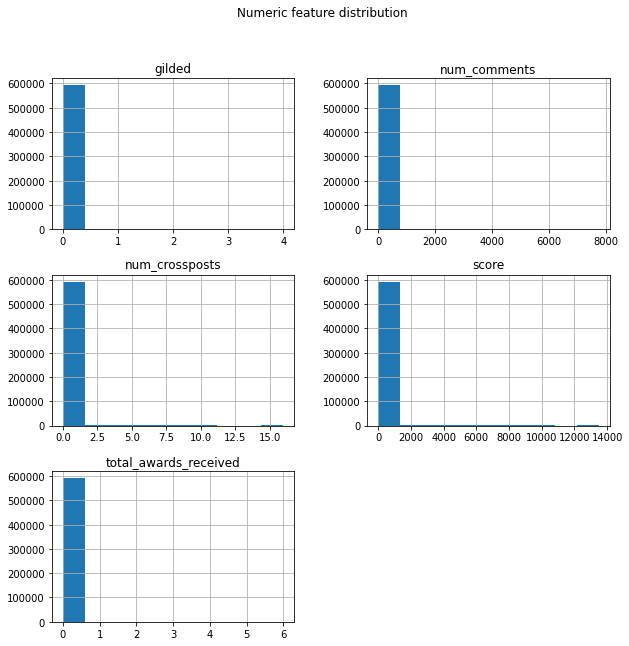

In [9]:
numeric_features.hist(figsize=[10,10])
plt.suptitle("Numeric feature distribution")
plt.show()

In [0]:
categorical_features = data[['author_patreon_flair','author_premium','can_mod_post','contest_mode','is_crosspostable','is_meta','is_original_content','is_reddit_media_domain','is_robot_indexable','is_self','is_video','locked','media_only','no_follow','parent_whitelist_status','pinned','post_hint','removed_by_category','send_replies','stickied','whitelist_status','author_cakeday','thumbnail','spoiler','domain','locked','over_18','is_original_content','is_self',
                           'poll_data','removed_by','banned_by','hidden','brand_safe']]
target_feature = data[['link_flair_text']]                           

We analyze the target variable column for checking iregularities.

We see that data is not uniformly distributed and is mostly concentrated by Non-Political and Politics posts.


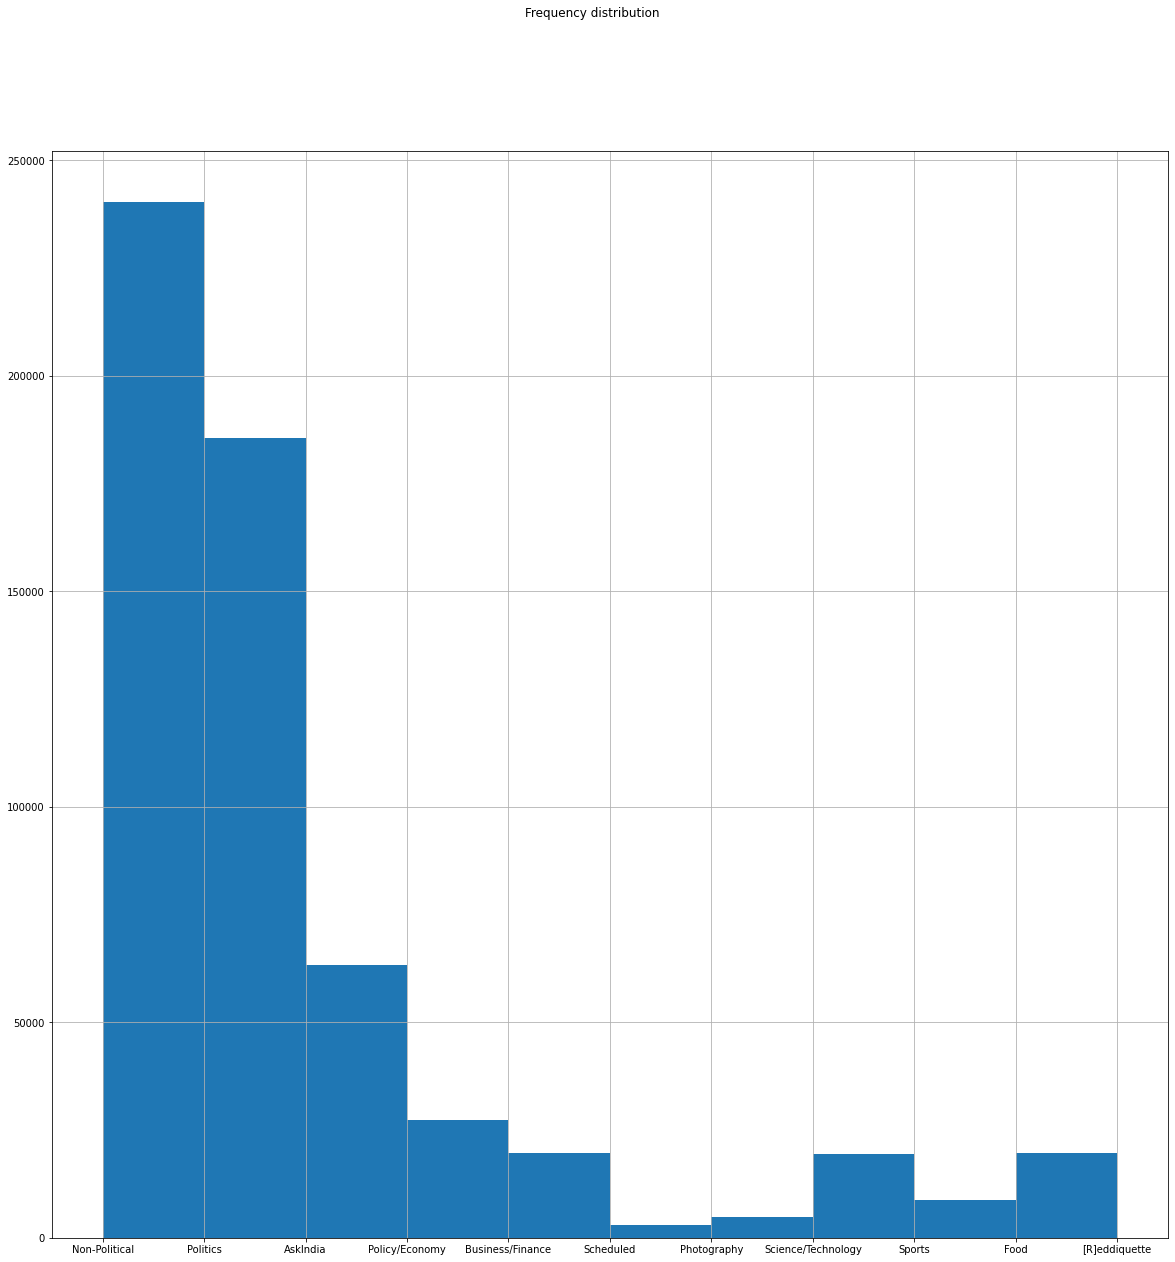

In [11]:
target_feature.link_flair_text.hist(figsize=[20,20])
plt.suptitle("Frequency distribution")
plt.show()

In [12]:
pd.unique(data.link_flair_text)

array(['Non-Political', 'Politics', 'AskIndia', 'Policy/Economy',
       'Business/Finance', 'Scheduled', 'Photography',
       'Science/Technology', 'Sports', 'Food', '[R]eddiquette'],
      dtype=object)

In [13]:
data.link_flair_text.value_counts(dropna=False)

Non-Political         240169
Politics              185434
AskIndia               63384
Policy/Economy         27217
Business/Finance       19601
Science/Technology     19425
[R]eddiquette          15044
Sports                  8779
Photography             4742
Food                    4637
Scheduled               3052
Name: link_flair_text, dtype: int64

The ViolinPlot is very good at presenting statistical information such as outliers. The plot consists of a violin shape bounded above and below by “hinges” that represent 75% and 25% quantiles respectively. You can also see the upper and lower “whiskers”. The vertical axis is in the units of the quantitative variable. Data points above the upper whiskers and far away are the suspected “outliers”.

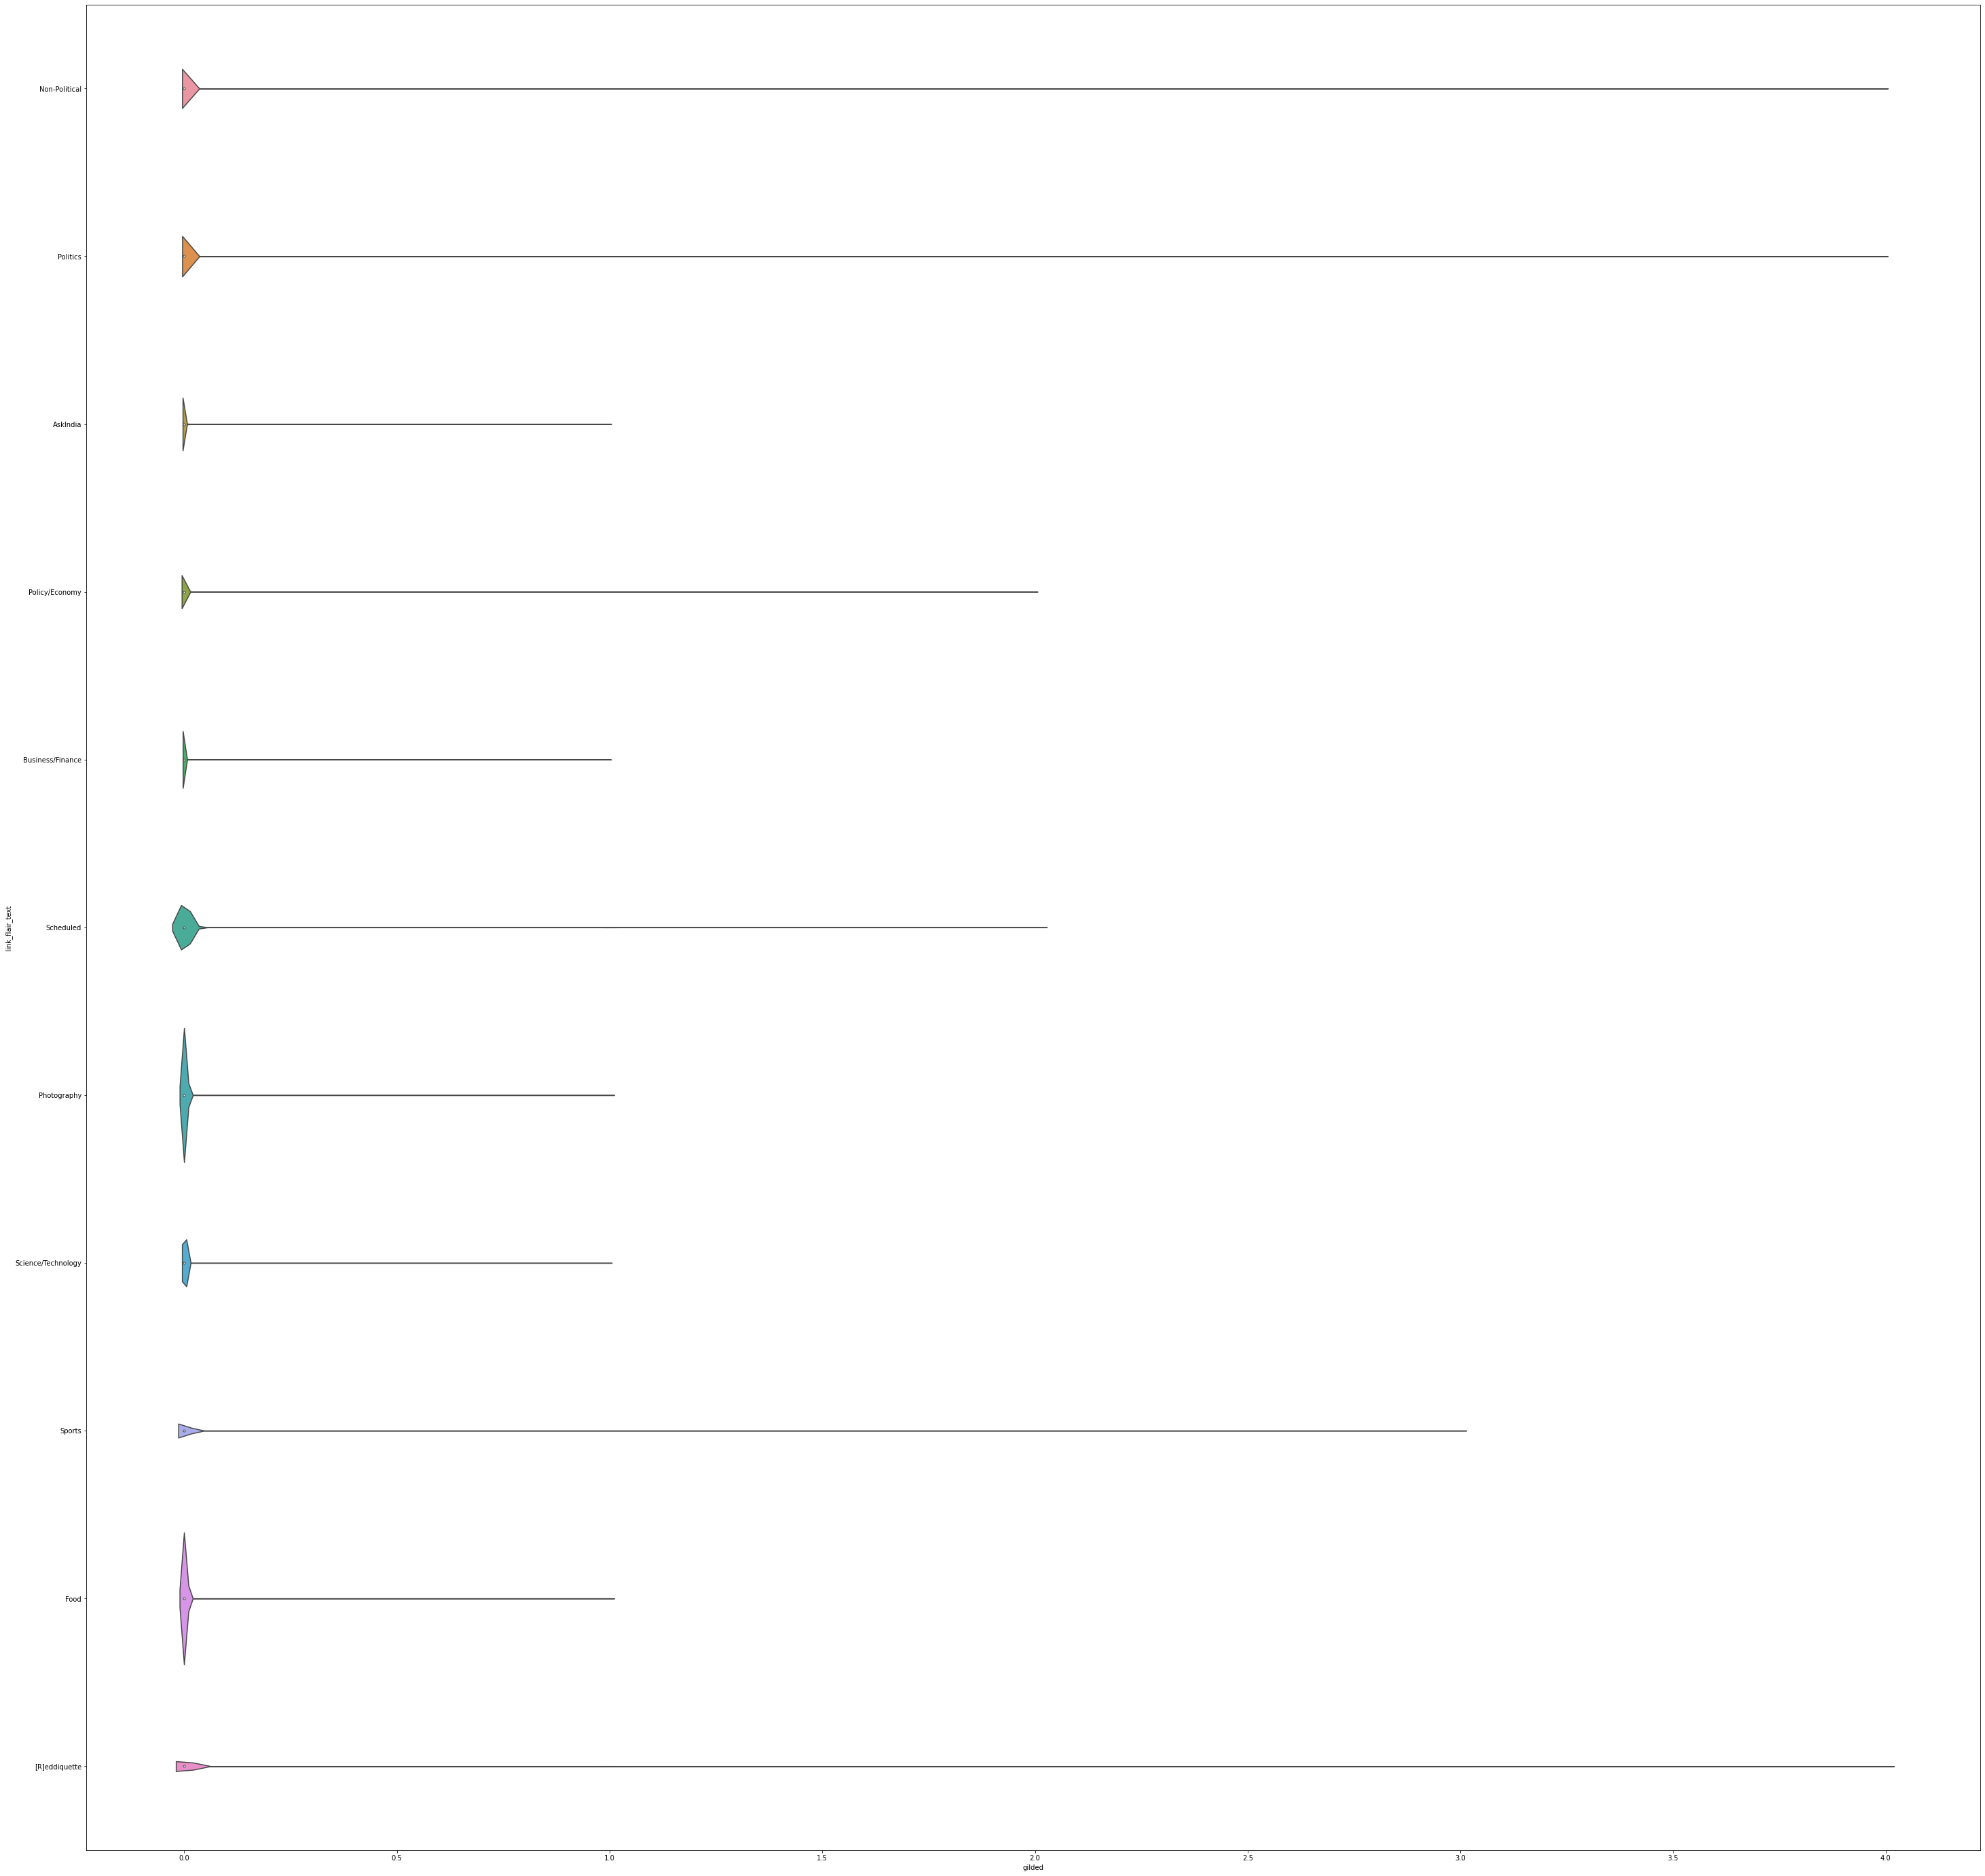

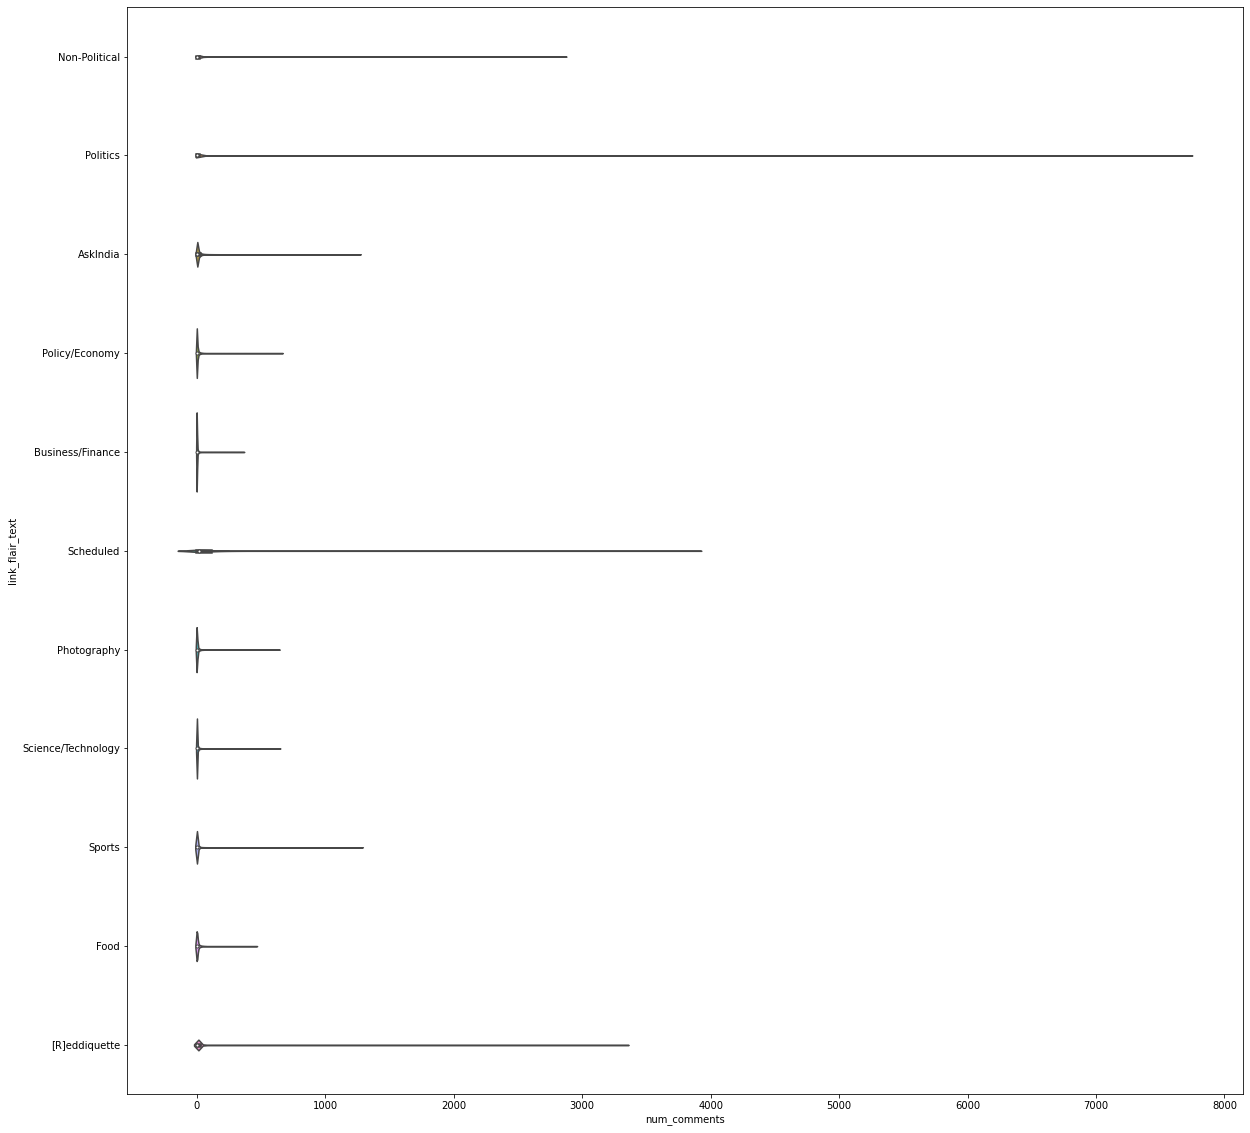

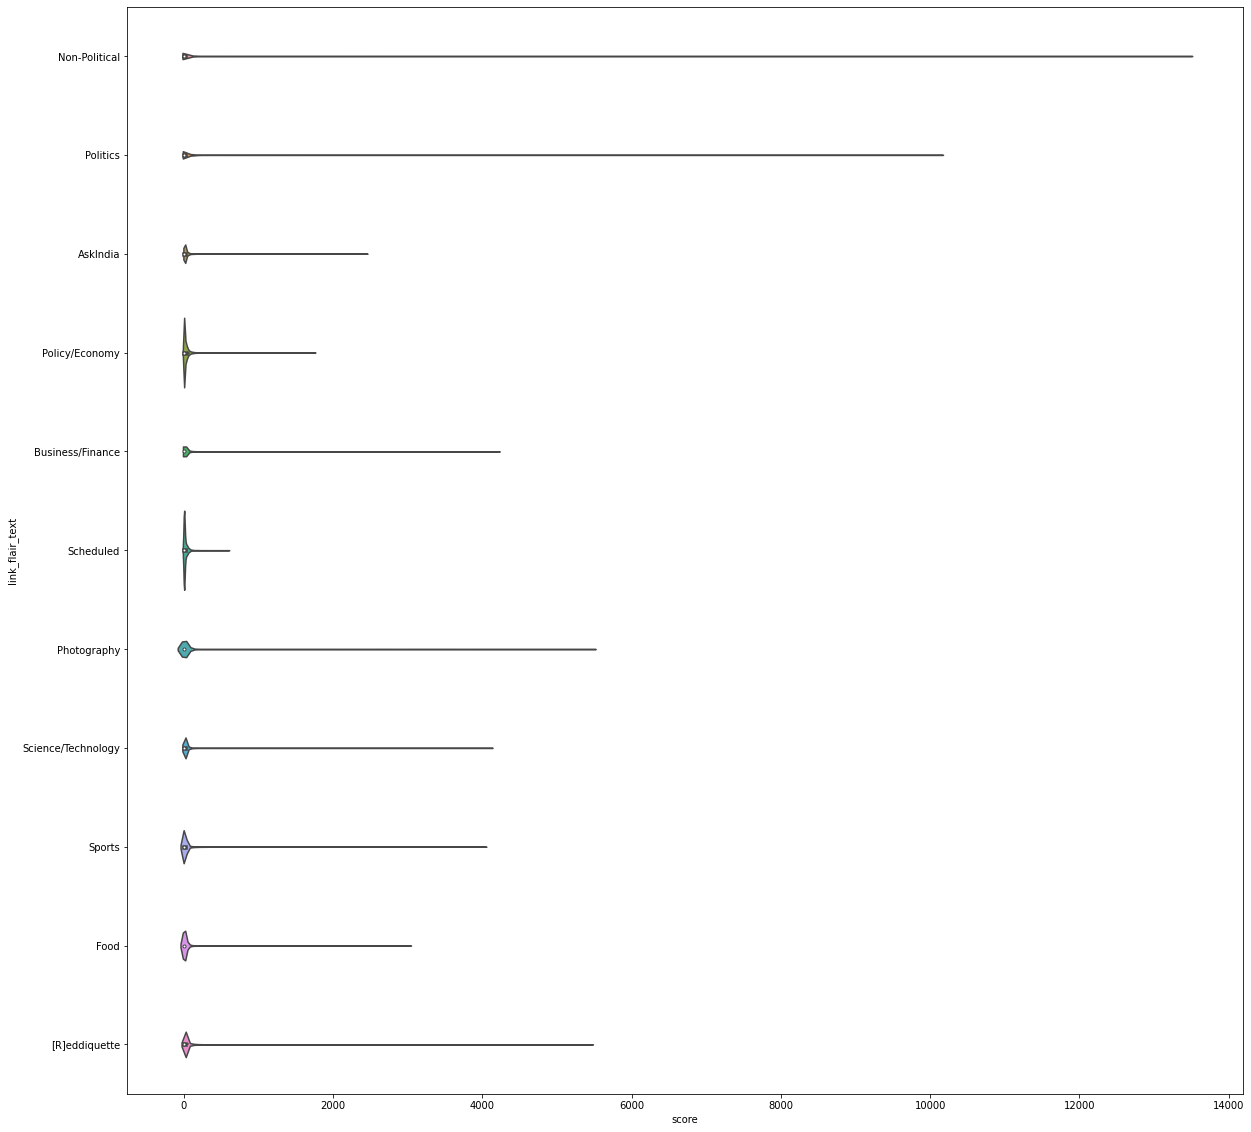

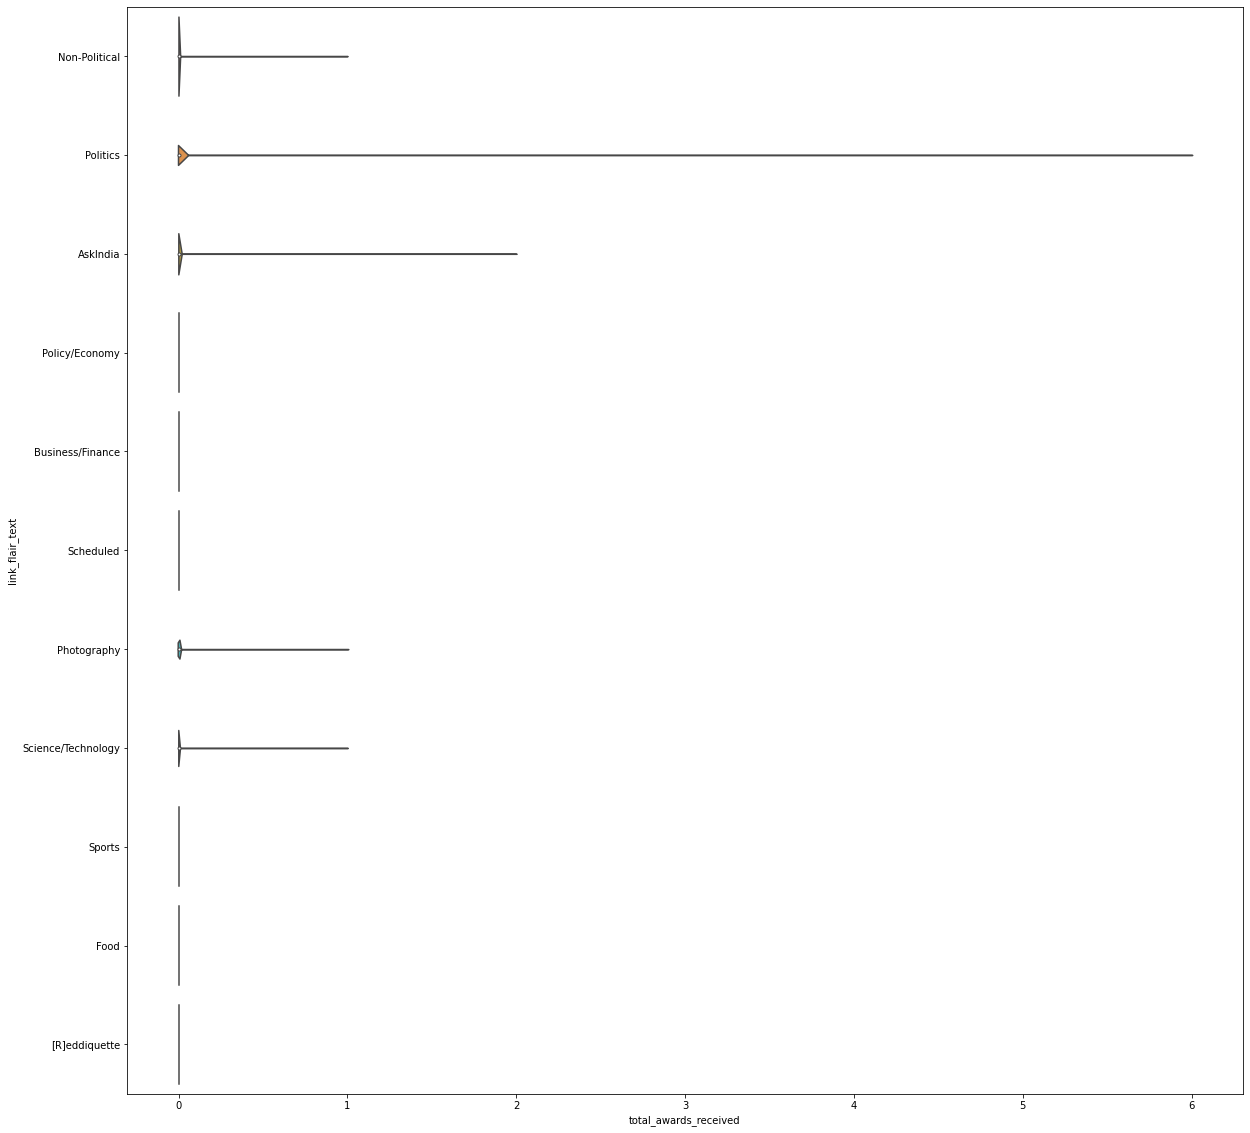

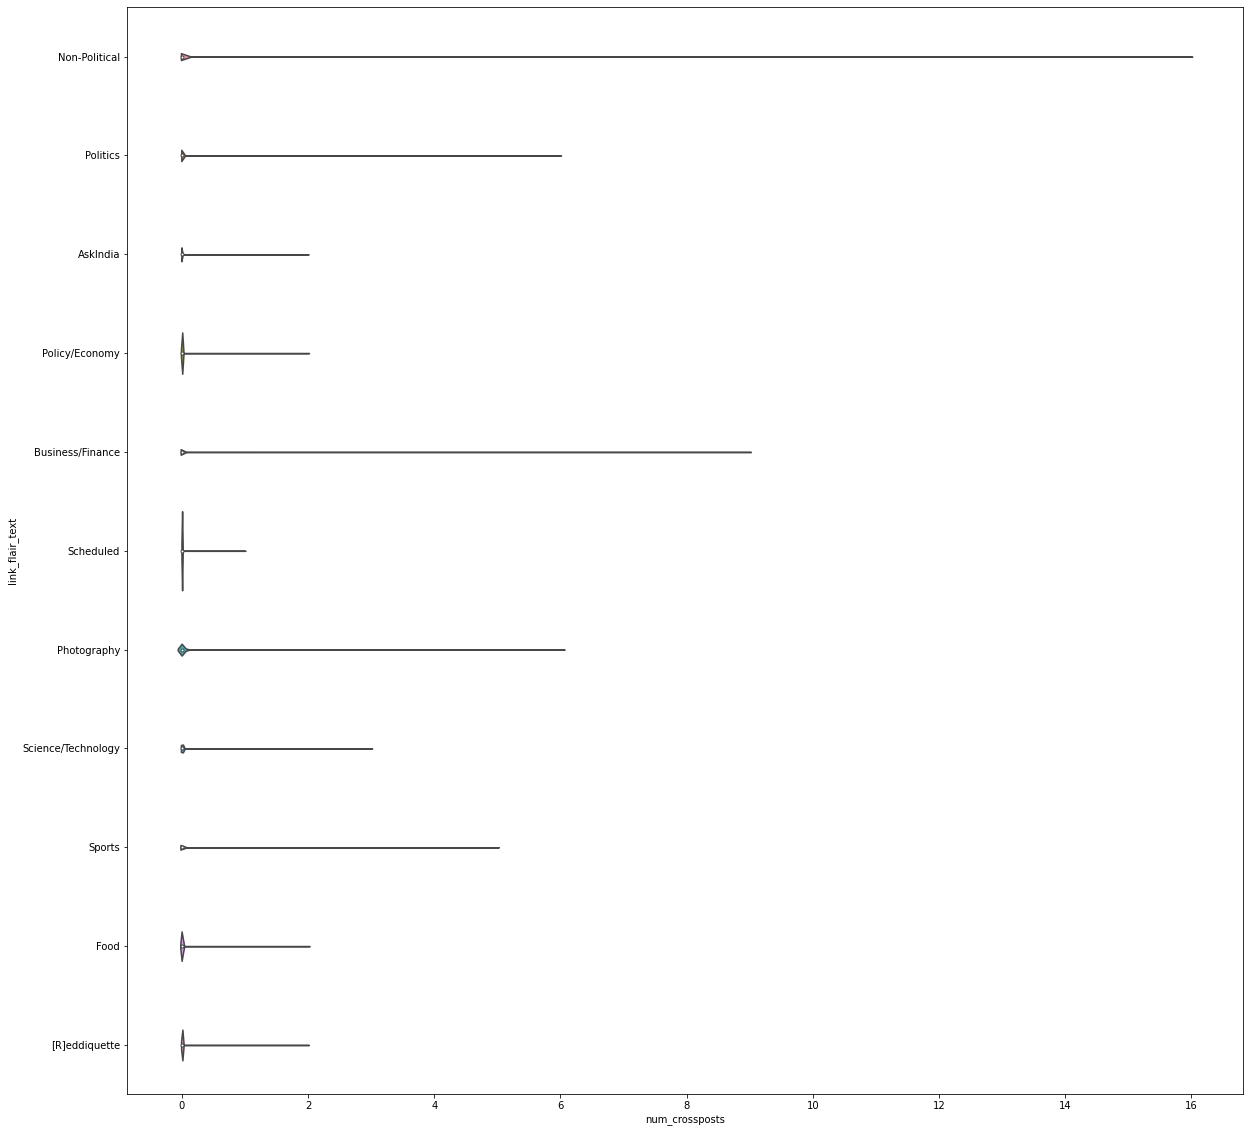

In [14]:
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

plt.figure(figsize=(50,50))
sns.violinplot(x=numeric_features.gilded,y=target_feature.link_flair_text)
#sns.swarmplot(x=numeric_features.gilded,y=target_feature.link_flair_text, color=".25")
plt.show()

plt.figure(figsize=(20,20))
sns.violinplot(x=numeric_features.num_comments,y=target_feature.link_flair_text)
#sns.swarmplot(x=numeric_features.num_comments,y=target_feature.link_flair_text, color=".25")
plt.show()

plt.figure(figsize=(20,20))
sns.violinplot(x=numeric_features.score,y=target_feature.link_flair_text)
#sns.swarmplot(x=numeric_features.score,y=target_feature.link_flair_text, color=".25")
plt.show()

plt.figure(figsize=(20,20))
sns.violinplot(x=numeric_features.total_awards_received,y=target_feature.link_flair_text)
#sns.swarmplot(x=numeric_features.num_comments,y=target_feature.link_flair_text, color=".25")
plt.show()

plt.figure(figsize=(20,20))
sns.violinplot(x=numeric_features.num_crossposts,y=target_feature.link_flair_text)
#sns.swarmplot(x=numeric_features.score,y=target_feature.link_flair_text, color=".25")
plt.show()


Insights:

1. The posts in politics have the smallest median upvote ratio as compared to ther flairs.
2. The posts with 'Scheduled' flair have a large amount of comments due to heavy discussions and debates by users on those posts.
3. The 'Politics' flaired posts have a lot of outliers in score and number of comments.
4. The posts with 'photography' tend to have larger upvote ratio but lower number of comments.

We will start by visualizing the PDF for a single feature.  

1. We can see that 'score' is usually concentrated around 0-1000.
2. 'gilded' is usually 1.
3. 'num_comments' is concentrated around 0-1000.
4. 'num_crossposts is usually 1.


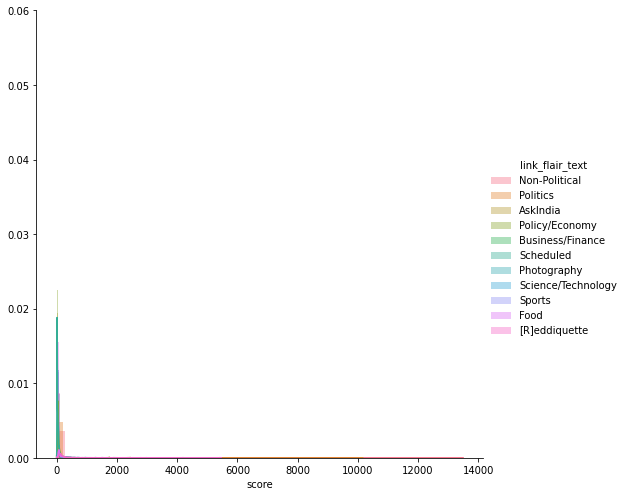

In [15]:
sns.FacetGrid(data,hue="link_flair_text",height = 7).map(sns.distplot,"score").add_legend()
plt.show()

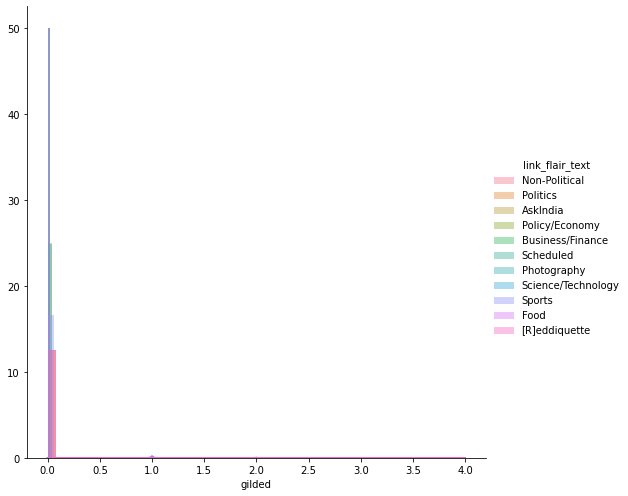

In [16]:
sns.FacetGrid(data,hue="link_flair_text",height = 7).map(sns.distplot,"gilded").add_legend()
plt.show()


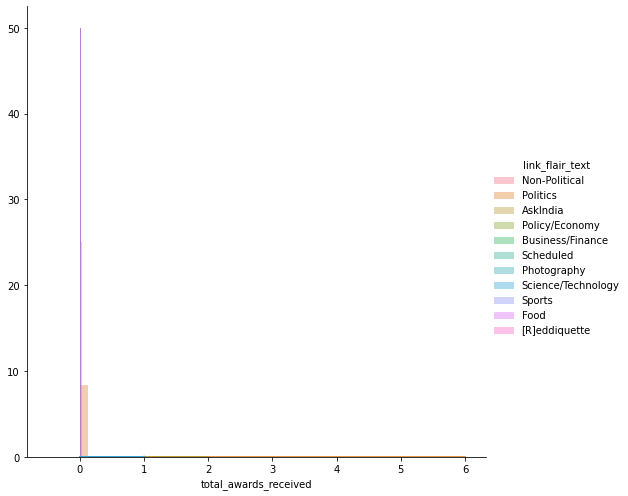

In [17]:
sns.FacetGrid(data,hue="link_flair_text",height = 7).map(sns.distplot,"total_awards_received").add_legend()
plt.show()



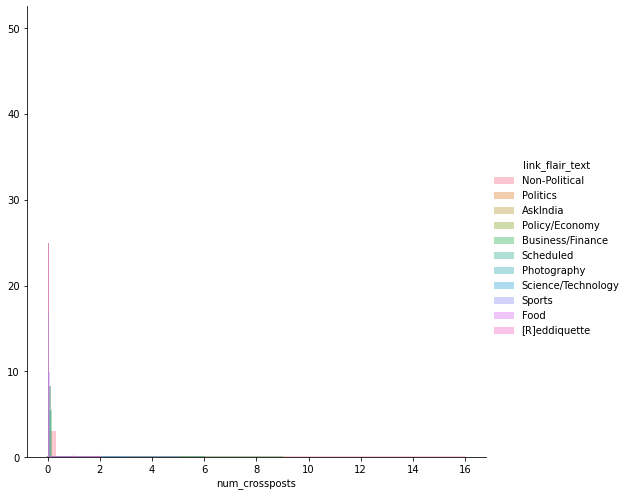

In [18]:
sns.FacetGrid(data,hue="link_flair_text",height = 7).map(sns.distplot,"num_crossposts").add_legend()
plt.show()



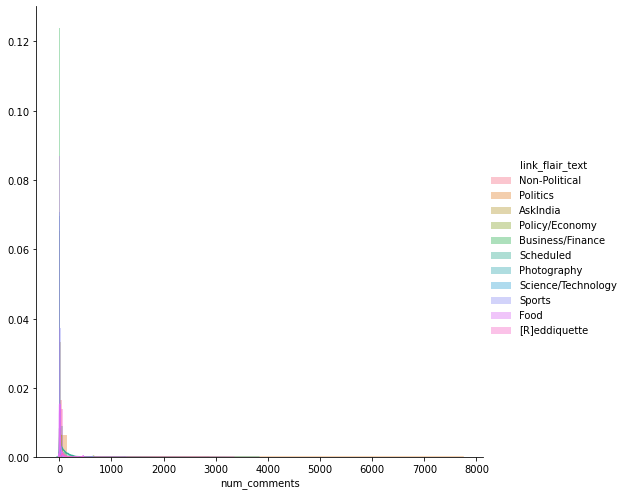

In [19]:
sns.FacetGrid(data,hue="link_flair_text",height = 7).map(sns.distplot,"num_comments").add_legend()
plt.show()



CDF is the probability that a corresponding continuous random variable has a value less than or equal to a given value. It gives the area under the probability density function. 



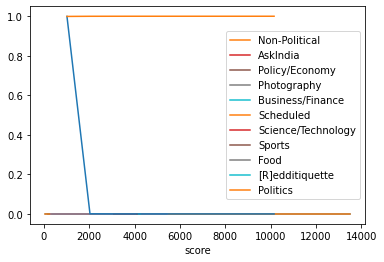

In [21]:
import numpy as np
non_political = data[data["link_flair_text"]=='Non-Political']
politics = data[data["link_flair_text"]=='Politics']
ask = data[data["link_flair_text"]=='AskIndia']
pol = data[data["link_flair_text"]=='Policy/Economy']
bus = data[data["link_flair_text"]=='Business/Finance']
sched = data[data["link_flair_text"]=='Scheduled']
photo = data[data["link_flair_text"]=='Photography']
sci = data[data["link_flair_text"]=='Science/Technology']
spo = data[data["link_flair_text"]=='Sports']
food = data[data["link_flair_text"]=='Food']
redd = data[data["link_flair_text"]=='[R]edditquette']

counts_related, bin_edges_related = np.histogram(non_political['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Non-Political')
plt.xlabel('score')
counts_related, bin_edges_related = np.histogram(ask['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'AskIndia')

counts_related, bin_edges_related = np.histogram(pol['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Policy/Economy')

counts_related, bin_edges_related = np.histogram(photo['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Photography')

counts_related, bin_edges_related = np.histogram(bus['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Business/Finance')

counts_related, bin_edges_related = np.histogram(sched['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Scheduled')

counts_related, bin_edges_related = np.histogram(sci['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Science/Technology')

counts_related, bin_edges_related = np.histogram(spo['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Sports')

counts_related, bin_edges_related = np.histogram(food['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Food')

counts_related, bin_edges_related = np.histogram(redd['score'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = '[R]edditiquette')

counts_not_related, bin_edges_not_related = np.histogram(politics['score'], bins=10, density = True)
pdf_not_related = counts_not_related/(sum(counts_not_related))
cdf_not_related = np.cumsum(pdf_not_related)
plt.plot(bin_edges_not_related[1:], pdf_not_related)
plt.plot(bin_edges_not_related[1:], cdf_not_related, label = 'Politics')
plt.xlabel('score')
plt.legend()
plt.show()

We can infer that 'Politics' posts are more likely to have low scores whereas 'Non-Politcal' posts have much more high scoring probability.

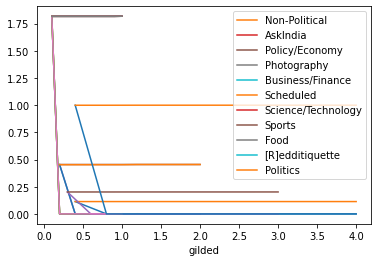

In [22]:
import numpy as np
non_political = data[data["link_flair_text"]=='Non-Political']
politics = data[data["link_flair_text"]=='Politics']
ask = data[data["link_flair_text"]=='AskIndia']
pol = data[data["link_flair_text"]=='Policy/Economy']
bus = data[data["link_flair_text"]=='Business/Finance']
sched = data[data["link_flair_text"]=='Scheduled']
photo = data[data["link_flair_text"]=='Photography']
sci = data[data["link_flair_text"]=='Science/Technology']
spo = data[data["link_flair_text"]=='Sports']
food = data[data["link_flair_text"]=='Food']
redd = data[data["link_flair_text"]=='[R]edditquette']

counts_related, bin_edges_related = np.histogram(non_political['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Non-Political')
plt.xlabel('score')
counts_related, bin_edges_related = np.histogram(ask['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'AskIndia')

counts_related, bin_edges_related = np.histogram(pol['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Policy/Economy')

counts_related, bin_edges_related = np.histogram(photo['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Photography')

counts_related, bin_edges_related = np.histogram(bus['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Business/Finance')

counts_related, bin_edges_related = np.histogram(sched['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Scheduled')

counts_related, bin_edges_related = np.histogram(sci['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Science/Technology')

counts_related, bin_edges_related = np.histogram(spo['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Sports')

counts_related, bin_edges_related = np.histogram(food['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Food')

counts_related, bin_edges_related = np.histogram(redd['gilded'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = '[R]edditiquette')

counts_not_related, bin_edges_not_related = np.histogram(politics['gilded'], bins=10, density = True)
pdf_not_related = counts_not_related/(sum(counts_not_related))
cdf_not_related = np.cumsum(pdf_not_related)
plt.plot(bin_edges_not_related[1:], pdf_not_related)
plt.plot(bin_edges_not_related[1:], cdf_not_related, label = 'Politics')
plt.xlabel('gilded')
plt.legend()
plt.show()

'Photography','Scheduled' and 'Politics' posts are more gilded  than others.

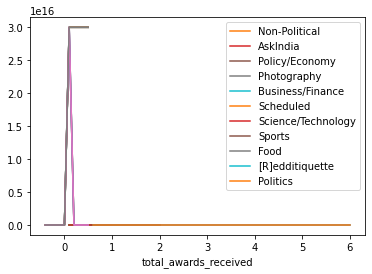

In [23]:
import numpy as np
non_political = data[data["link_flair_text"]=='Non-Political']
politics = data[data["link_flair_text"]=='Politics']
ask = data[data["link_flair_text"]=='AskIndia']
pol = data[data["link_flair_text"]=='Policy/Economy']
bus = data[data["link_flair_text"]=='Business/Finance']
sched = data[data["link_flair_text"]=='Scheduled']
photo = data[data["link_flair_text"]=='Photography']
sci = data[data["link_flair_text"]=='Science/Technology']
spo = data[data["link_flair_text"]=='Sports']
food = data[data["link_flair_text"]=='Food']
redd = data[data["link_flair_text"]=='[R]edditquette']

counts_related, bin_edges_related = np.histogram(non_political['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Non-Political')
plt.xlabel('score')
counts_related, bin_edges_related = np.histogram(ask['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'AskIndia')

counts_related, bin_edges_related = np.histogram(pol['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Policy/Economy')

counts_related, bin_edges_related = np.histogram(photo['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Photography')

counts_related, bin_edges_related = np.histogram(bus['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Business/Finance')

counts_related, bin_edges_related = np.histogram(sched['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Scheduled')

counts_related, bin_edges_related = np.histogram(sci['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Science/Technology')

counts_related, bin_edges_related = np.histogram(spo['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Sports')

counts_related, bin_edges_related = np.histogram(food['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Food')

counts_related, bin_edges_related = np.histogram(redd['total_awards_received'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = '[R]edditiquette')

counts_not_related, bin_edges_not_related = np.histogram(politics['total_awards_received'], bins=10, density = True)
pdf_not_related = counts_not_related/(sum(counts_not_related))
cdf_not_related = np.cumsum(pdf_not_related)
plt.plot(bin_edges_not_related[1:], pdf_not_related)
plt.plot(bin_edges_not_related[1:], cdf_not_related, label = 'Politics')
plt.xlabel('total_awards_received')
plt.legend()
plt.show()

'Photography' posts are awarded the most number of awards.

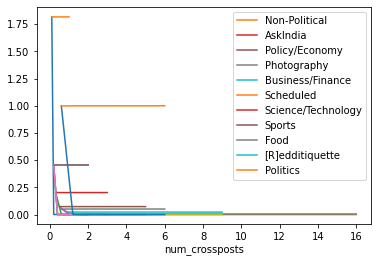

In [24]:
import numpy as np
non_political = data[data["link_flair_text"]=='Non-Political']
politics = data[data["link_flair_text"]=='Politics']
ask = data[data["link_flair_text"]=='AskIndia']
pol = data[data["link_flair_text"]=='Policy/Economy']
bus = data[data["link_flair_text"]=='Business/Finance']
sched = data[data["link_flair_text"]=='Scheduled']
photo = data[data["link_flair_text"]=='Photography']
sci = data[data["link_flair_text"]=='Science/Technology']
spo = data[data["link_flair_text"]=='Sports']
food = data[data["link_flair_text"]=='Food']
redd = data[data["link_flair_text"]=='[R]edditquette']

counts_related, bin_edges_related = np.histogram(non_political['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Non-Political')
plt.xlabel('score')
counts_related, bin_edges_related = np.histogram(ask['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'AskIndia')

counts_related, bin_edges_related = np.histogram(pol['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Policy/Economy')

counts_related, bin_edges_related = np.histogram(photo['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Photography')

counts_related, bin_edges_related = np.histogram(bus['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Business/Finance')

counts_related, bin_edges_related = np.histogram(sched['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Scheduled')

counts_related, bin_edges_related = np.histogram(sci['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Science/Technology')

counts_related, bin_edges_related = np.histogram(spo['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Sports')

counts_related, bin_edges_related = np.histogram(food['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Food')

counts_related, bin_edges_related = np.histogram(redd['num_crossposts'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = '[R]edditiquette')

counts_not_related, bin_edges_not_related = np.histogram(politics['num_crossposts'], bins=10, density = True)
pdf_not_related = counts_not_related/(sum(counts_not_related))
cdf_not_related = np.cumsum(pdf_not_related)
plt.plot(bin_edges_not_related[1:], pdf_not_related)
plt.plot(bin_edges_not_related[1:], cdf_not_related, label = 'Politics')
plt.xlabel('num_crossposts')
plt.legend()
plt.show()

'Non-Politcal', 'Science/Technology' and 'Politics' posts have much more number of crossposts.

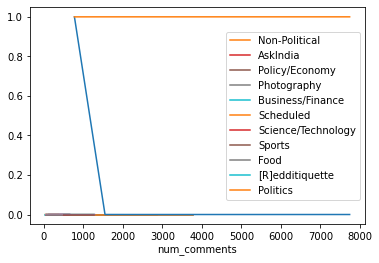

In [25]:
import numpy as np
non_political = data[data["link_flair_text"]=='Non-Political']
politics = data[data["link_flair_text"]=='Politics']
ask = data[data["link_flair_text"]=='AskIndia']
pol = data[data["link_flair_text"]=='Policy/Economy']
bus = data[data["link_flair_text"]=='Business/Finance']
sched = data[data["link_flair_text"]=='Scheduled']
photo = data[data["link_flair_text"]=='Photography']
sci = data[data["link_flair_text"]=='Science/Technology']
spo = data[data["link_flair_text"]=='Sports']
food = data[data["link_flair_text"]=='Food']
redd = data[data["link_flair_text"]=='[R]edditquette']

counts_related, bin_edges_related = np.histogram(non_political['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Non-Political')
plt.xlabel('score')
counts_related, bin_edges_related = np.histogram(ask['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'AskIndia')

counts_related, bin_edges_related = np.histogram(pol['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Policy/Economy')

counts_related, bin_edges_related = np.histogram(photo['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Photography')

counts_related, bin_edges_related = np.histogram(bus['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Business/Finance')

counts_related, bin_edges_related = np.histogram(sched['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Scheduled')

counts_related, bin_edges_related = np.histogram(sci['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Science/Technology')

counts_related, bin_edges_related = np.histogram(spo['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Sports')

counts_related, bin_edges_related = np.histogram(food['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Food')

counts_related, bin_edges_related = np.histogram(redd['num_comments'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = '[R]edditiquette')

counts_not_related, bin_edges_not_related = np.histogram(politics['num_comments'], bins=10, density = True)
pdf_not_related = counts_not_related/(sum(counts_not_related))
cdf_not_related = np.cumsum(pdf_not_related)
plt.plot(bin_edges_not_related[1:], pdf_not_related)
plt.plot(bin_edges_not_related[1:], cdf_not_related, label = 'Politics')
plt.xlabel('num_comments')
plt.legend()
plt.show()

'Scheduled'& 'Politics' have the much more number of comments than others.

The characteristics of interest for a categorical variable are simply the range of values and the frequency of occurrence of each value. One form of useful such univariate analysis is the tabulation of the frequencies. 

This can be very helpful for finding mistakes and missing data.

In [26]:
counts = categorical_features['author_patreon_flair'].value_counts()
percent100 = categorical_features["author_patreon_flair"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features['author_premium'].value_counts()
percent100 = categorical_features["author_premium"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features['can_mod_post'].value_counts()
percent100 = categorical_features["can_mod_post"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features['contest_mode'].value_counts()
percent100 = categorical_features["contest_mode"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features['is_crosspostable'].value_counts()
percent100 = categorical_features["is_crosspostable"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features['can_mod_post'].value_counts()
percent100 = categorical_features["can_mod_post"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features['is_meta'].value_counts()
percent100 = categorical_features["is_meta"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = data.is_original_content.value_counts()
percent100 = data.is_original_content.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features['is_reddit_media_domain'].value_counts()
percent100 = categorical_features["is_reddit_media_domain"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features['is_robot_indexable'].value_counts()
percent100 = categorical_features["is_robot_indexable"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features['is_reddit_media_domain'].value_counts()
percent100 = categorical_features["is_reddit_media_domain"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["is_video"].value_counts()
percent100 = categorical_features["is_video"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = data.locked.value_counts(dropna=False)
percent100 = data.locked.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["media_only"].value_counts()
percent100 = categorical_features["media_only"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["no_follow"].value_counts()
percent100 = categorical_features["no_follow"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["parent_whitelist_status"].value_counts()
percent100 = categorical_features["parent_whitelist_status"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["pinned"].value_counts()
percent100 = categorical_features["pinned"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["post_hint"].value_counts()
percent100 = categorical_features["post_hint"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["removed_by_category"].value_counts()
percent100 = categorical_features["removed_by_category"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["send_replies"].value_counts()
percent100 = categorical_features["send_replies"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["stickied"].value_counts()
percent100 = categorical_features["stickied"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["whitelist_status"].value_counts()
percent100 = categorical_features["whitelist_status"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["author_cakeday"].value_counts()
percent100 = categorical_features["author_cakeday"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["thumbnail"].value_counts()
percent100 = categorical_features["thumbnail"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["spoiler"].value_counts()
percent100 = categorical_features["spoiler"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["domain"].value_counts()
percent100 = categorical_features["domain"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = data.is_self.value_counts()
percent100 = data.is_self.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)
counts = categorical_features["poll_data"].value_counts()
percent100 = categorical_features["poll_data"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["removed_by"].value_counts()
percent100 = categorical_features["removed_by"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["banned_by"].value_counts()
percent100 = categorical_features["banned_by"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["hidden"].value_counts()
percent100 = categorical_features["hidden"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)
counts = categorical_features["brand_safe"].value_counts()
percent100 = categorical_features["brand_safe"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(acc_day)


       counts Percent
True   456991   77.3%
False  134493   22.7%
       counts Percent
False  588996   99.6%
True     2488    0.4%
       counts Percent
True   307882   52.1%
False  283602   47.9%
       counts Percent
False  591473  100.0%
True       11    0.0%
       counts Percent
True   506927   85.7%
False   84557   14.3%
       counts Percent
True   307882   52.1%
False  283602   47.9%
       counts Percent
True   437025   73.9%
False  154459   26.1%
       counts Percent
False  590495   99.8%
True      989    0.2%
       counts Percent
False  561823   95.0%
True    29661    5.0%
       counts Percent
True   544070   92.0%
False   47414    8.0%
       counts Percent
False  561823   95.0%
True    29661    5.0%
       counts Percent
False  589304   99.6%
True     2180    0.4%
       counts Percent
False  441161   74.6%
True   150323   25.4%
       counts Percent
True   423538   71.6%
False  167946   28.4%
       counts Percent
False  414908   70.1%
True   176576   29.9%
         c

A scatter plot can be a very useful representation to visualize the relationship between two numerical variables. 

The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables. 

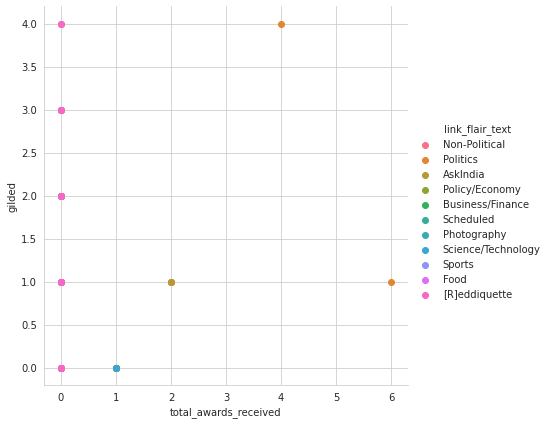

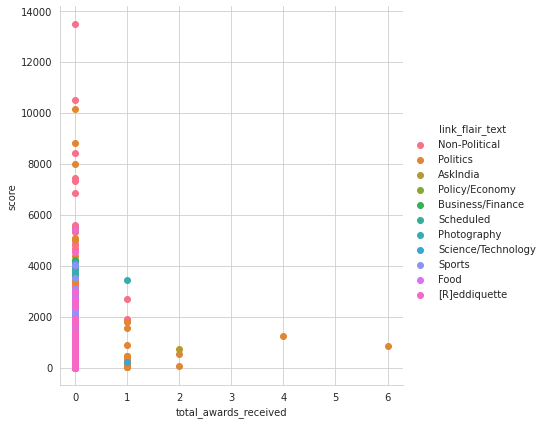

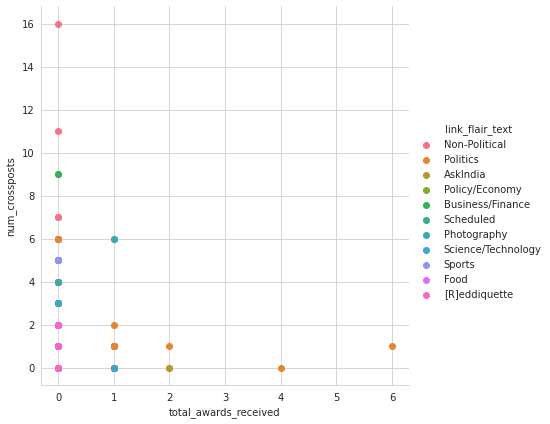

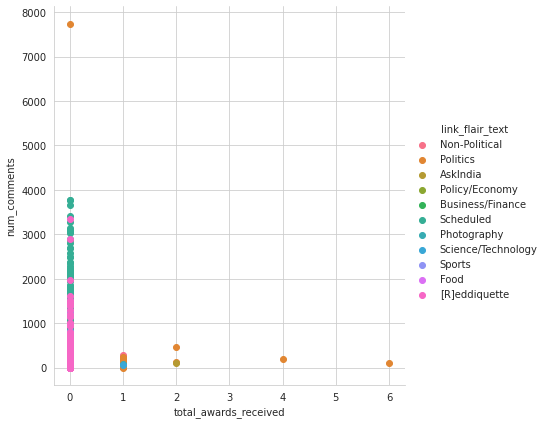

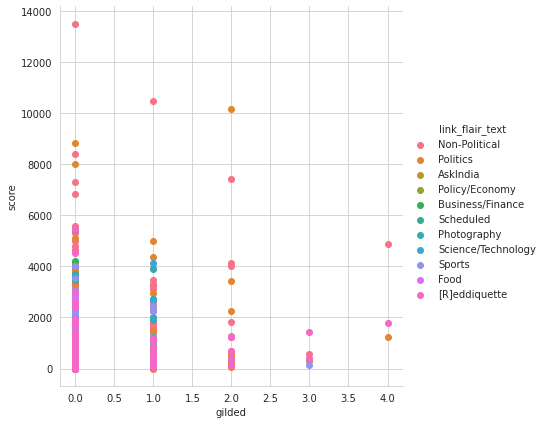

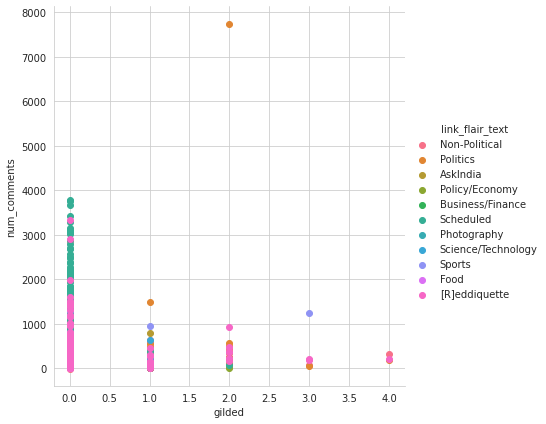

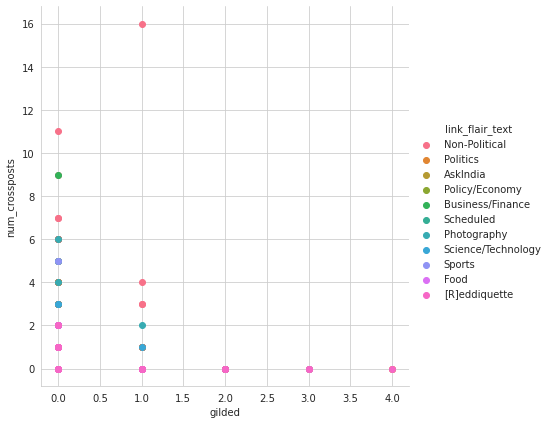

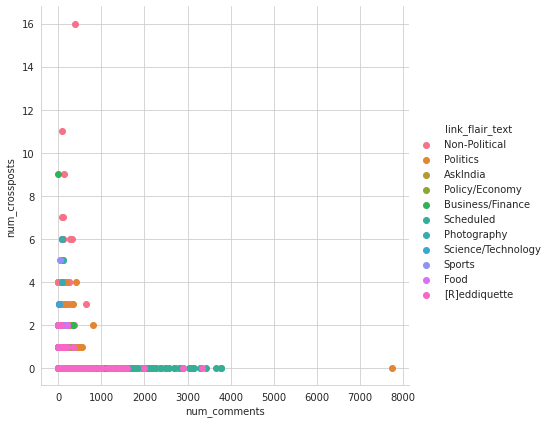

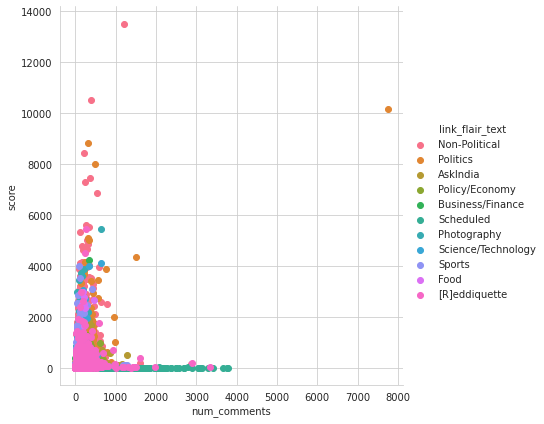

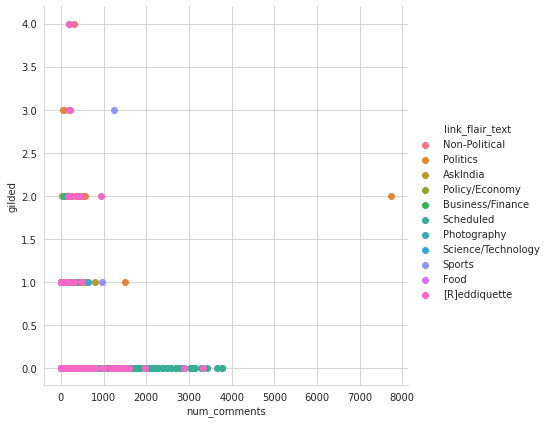

In [27]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,"total_awards_received","gilded").add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'total_awards_received','score').add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'total_awards_received','num_crossposts').add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'total_awards_received','num_comments').add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'gilded','score').add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'gilded','num_comments').add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'gilded','num_crossposts').add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'num_comments','num_crossposts').add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'num_comments','score').add_legend()
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "link_flair_text" , height = 6).map(plt.scatter,'num_comments','gilded').add_legend()
plt.show()


Pair plots of variables for a better understanding of variables associations.

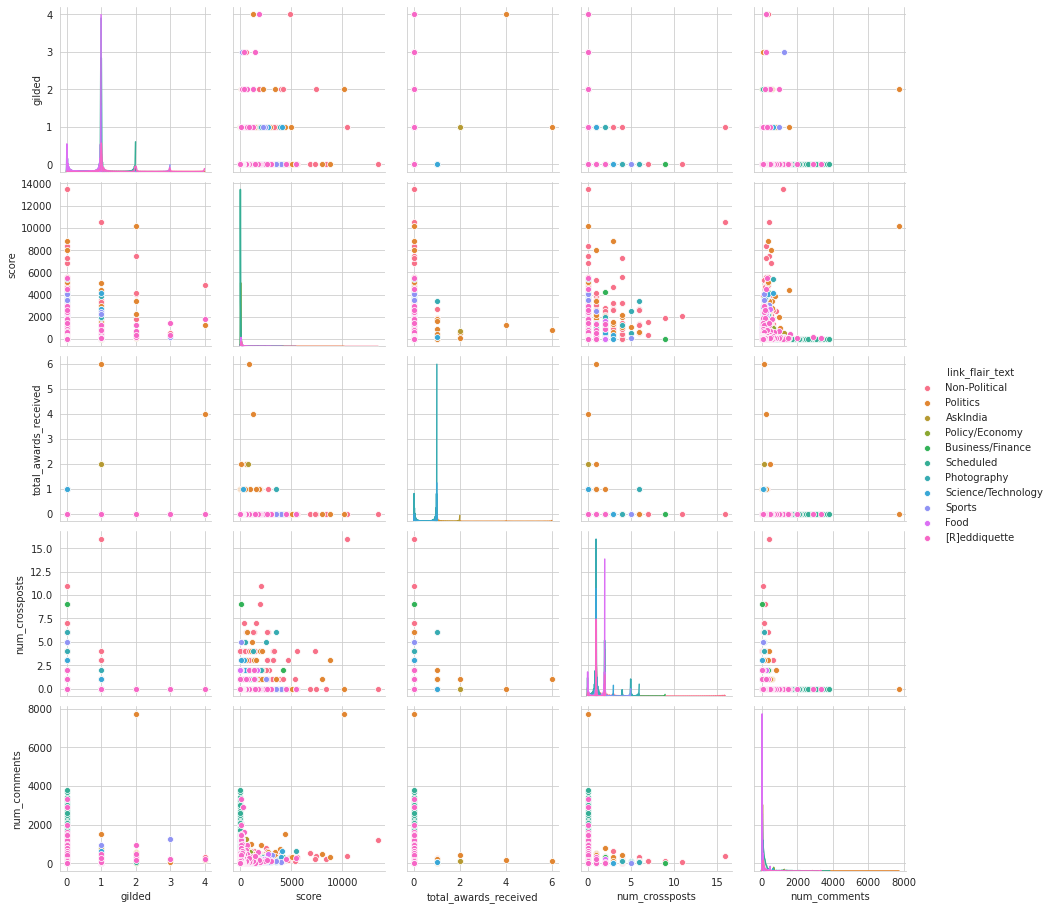

In [30]:
selected_numeric_features = data[['gilded','score','total_awards_received','num_crossposts','num_comments',"link_flair_text"]]
sns.set_style("whitegrid")
sns.pairplot(selected_numeric_features, hue = "link_flair_text")
plt.show()

A correlation matrix is “square matrix” with the same variables shown in the rows and columns. The level of correlation between the variables is highlighted with different colour intensities. The numeric values for the correlation range from 0 "Not correlated ” to 1 “highly correlated”.  Among the use cases of a correlation matrix is to summarize data to a more advanced analysis.  
Below, we plot the correlation heatmap for all pairs of numeric features. 

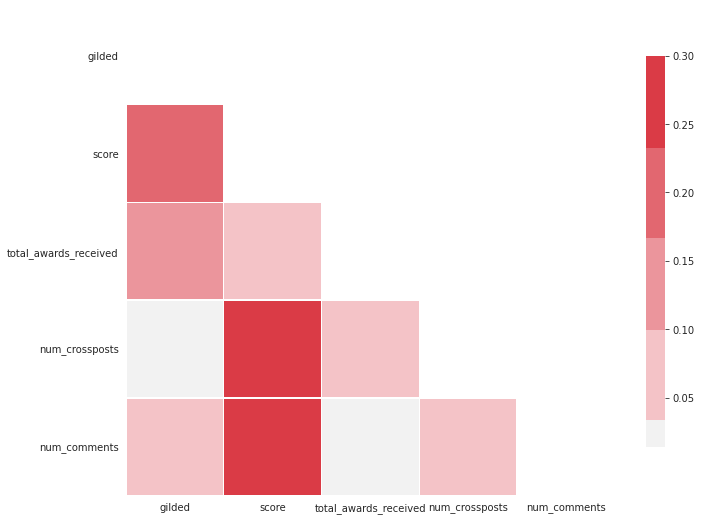

In [29]:
corr =  numeric_features.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

1. score and number of crossposts and gilded are highly correlated with each other.

2. gilded and total_awards_received and number of comments are moderately correlated.

3. score and total_awards_received are weakly correlated.

4. number of crossposts and total_awards_received are weakly correlated.

5. number of comments and number of crossposts are weakly correlated.

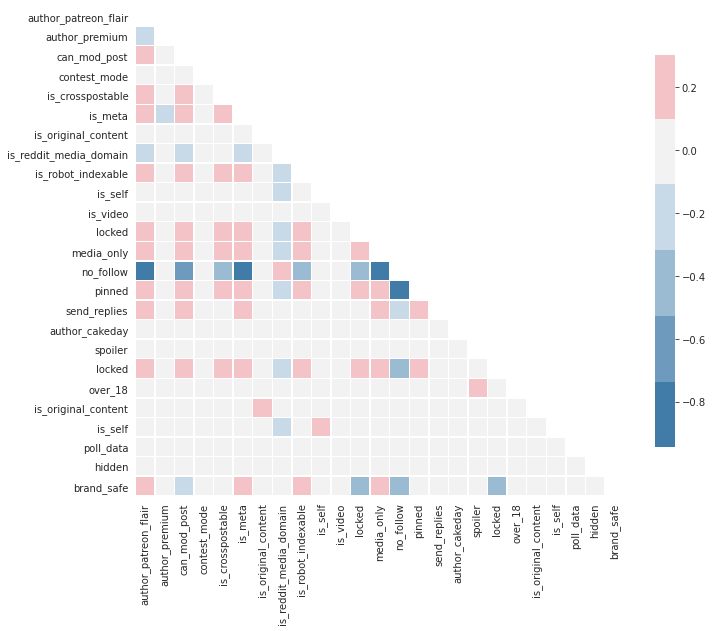

In [31]:
corr =  categorical_features.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

1. pinned and no_follow are very negatively correlated.
2. media_only and no_follow are very negatively correlated.
3. is_meta and no_follow are very negatively correlated.
4. author_patreon_flair and no_follow are very negatively correlated.
5. can_mod_post and no_follow are moderately negatively correlated.
6. can_mod_post and no_follow are moderately negatively correlated.

In [0]:
data.to_csv('finale.csv',index=False)